<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Interactive Visualization</h1>
<h1>Plotly</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np

import networkx as nx

import watermark

import plotly.express as px 
import plotly.figure_factory as ff 
import plotly.graph_objects as go 

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.11.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.0-69-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

Git hash: 24f494a22f6ac6b6378b6db1efb3361ea69fb84c

plotly   : 5.13.1
watermark: 2.3.1
pandas   : 1.5.3
numpy    : 1.24.2



# Basic Plotting

Generating a simple figure is straightforward

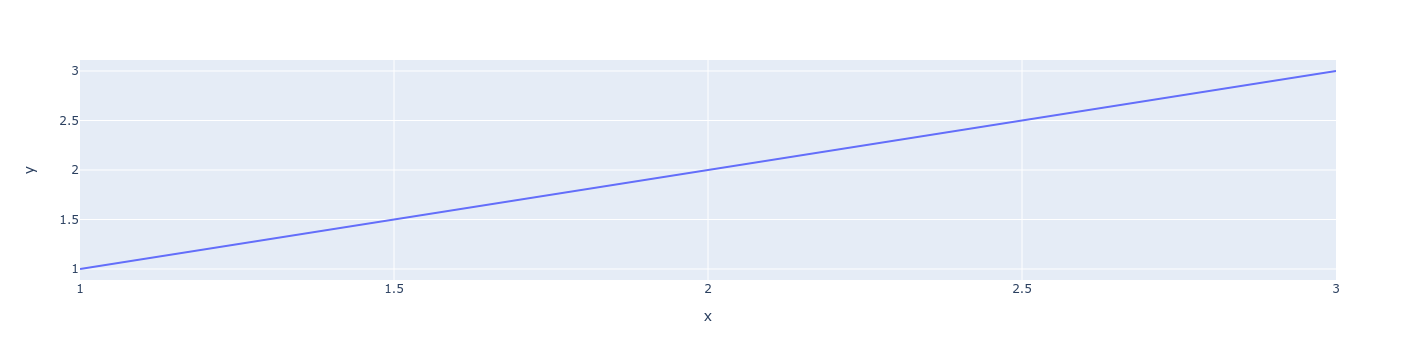

In [3]:
fig = px.line(x=[1,2, 3], y=[1, 2, 3]) 
fig.show()

As we saw, figures are just json objects that get used by the javascript backend to generate the final plot.

In [4]:
print(fig)

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([1, 2, 3]),
              'xaxis': 'x',
              'y': array([1, 2, 3]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


Load the gapminder dataset

In [5]:
gapminder = px.data.gapminder()

Keep only the data for the most recent year

In [6]:
gapminder_2007 = gapminder[gapminder.year == gapminder.year.max()].copy()
gapminder_2007

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

We start by generating a simple scatter plot

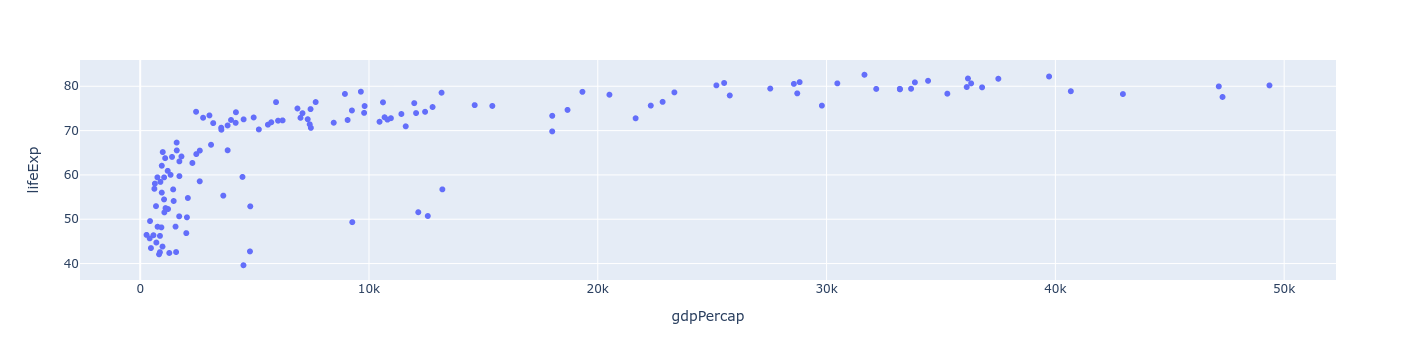

In [7]:
fig = px.scatter(gapminder_2007, x="gdpPercap", y="lifeExp") 
fig.show()

And set the x axis to log scale

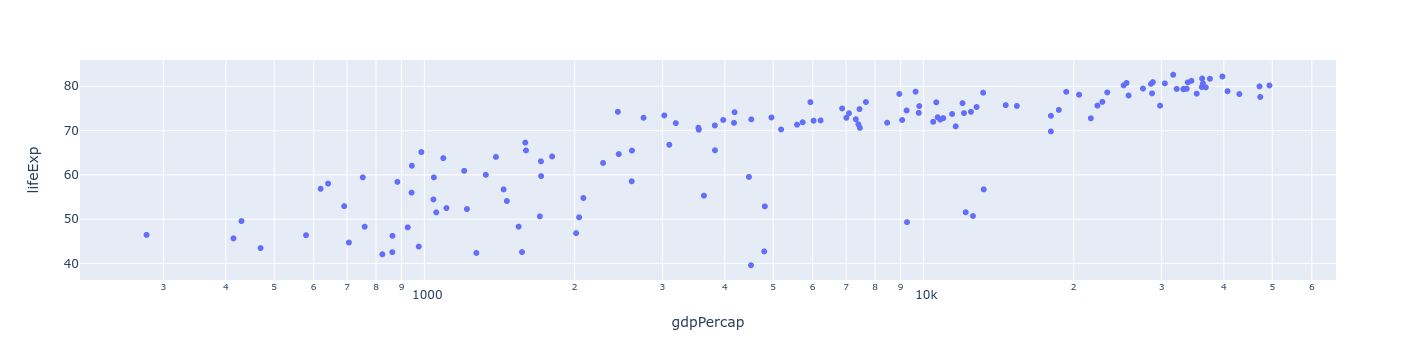

In [8]:
fig = px.scatter(gapminder_2007, x="gdpPercap", y="lifeExp", log_x=True) 
fig.show()

We can easily count the number of countries per continent

In [9]:
gapminder_2007[['continent', 'country']].groupby('continent').count()

country
continent         
Africa          52
Americas        25
Asia            33
Europe          30
Oceania          2

Or just generate a histogram with the respective columns

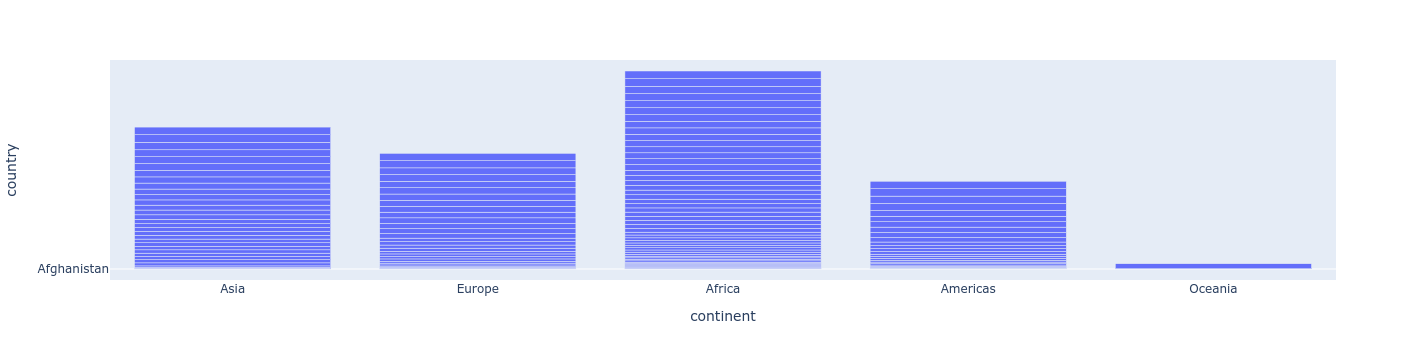

In [10]:
fig = px.bar(gapminder_2007, x="continent", y="country") 
fig.show()

## Histogram

In this case, we use a histogram to plot the total population by Continent

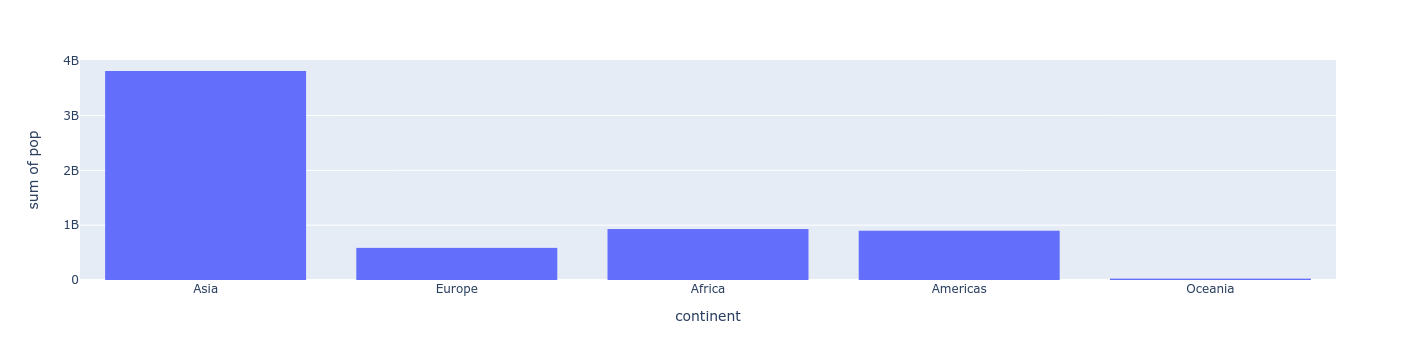

In [11]:
px.histogram(gapminder_2007, x="continent", y="pop").show()

## Bubble plot

Let us start with a simple scatter plot as above

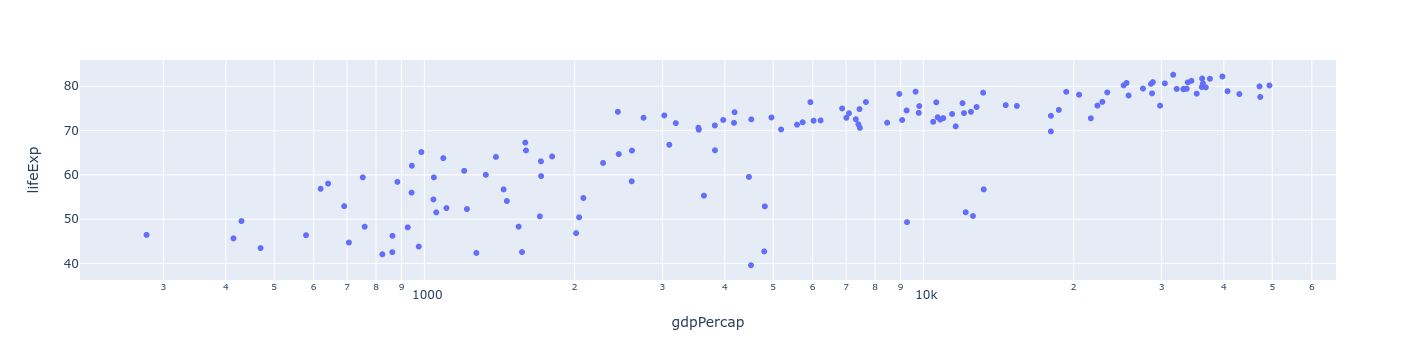

In [12]:
fig = px.scatter(gapminder_2007, x="gdpPercap", y="lifeExp", log_x=True) 
fig.show()

The flexibility of plotly makes it easy to add extra dimensions to our plot so that we can generate a bubble plot

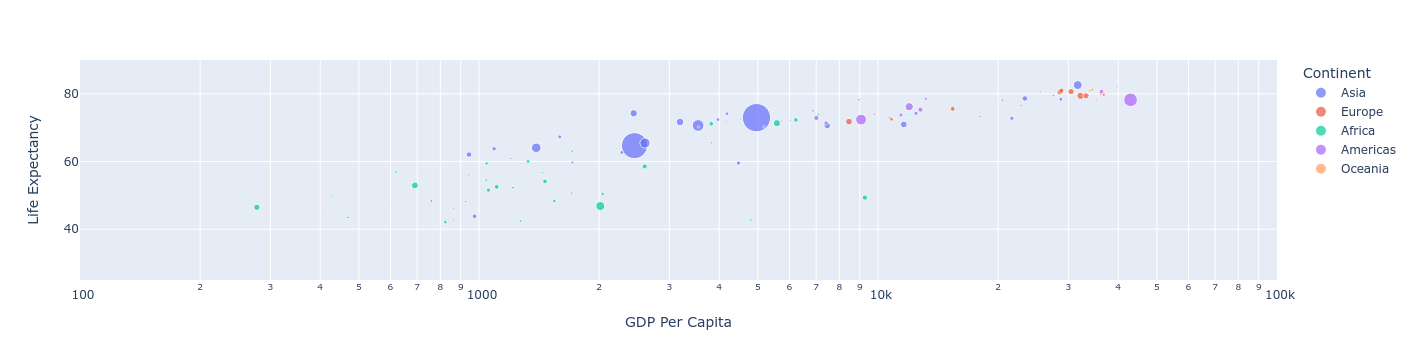

In [13]:
fig = px.scatter(gapminder_2007, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 size='pop',
                 color="continent",
                 hover_data=["country"],
                 labels={
                     "pop": "Population", 
                     "lifeExp": "Life Expectancy",
                     "continent": "Continent",
                     "gdpPercap": "GDP Per Capita",
                     "country": "Country"
                 },
                 log_x=True,
                 range_x=[100,100000], range_y=[25,90]) 
fig.show()

In [14]:
iris = px.data.iris()

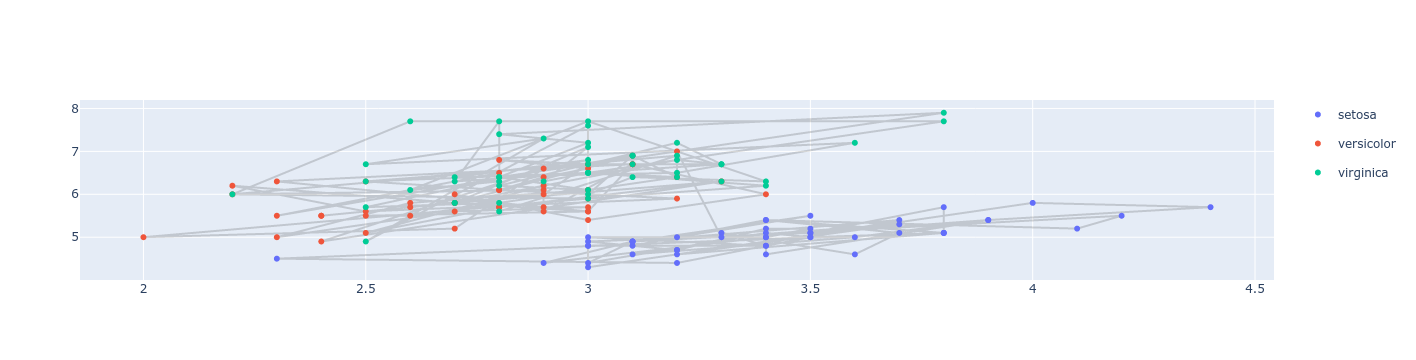

In [15]:
fig1 = px.line(iris, x="sepal_width", y="sepal_length")
fig1.update_traces(line=dict(color = 'rgba(50,50,50,0.2)'))

fig2 = px.scatter(iris, x="sepal_width", y="sepal_length", color="species")

fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

In [16]:
# using the tips dataset
tips = px.data.tips() 

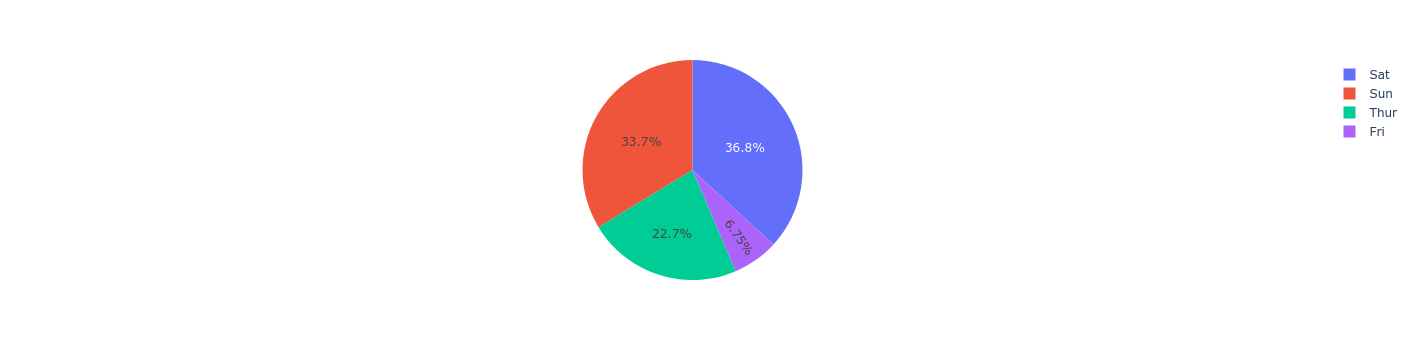

In [17]:
# plotting the pie chart
fig = px.pie(tips, values="total_bill", names="day") 
# showing the plot
fig.show()

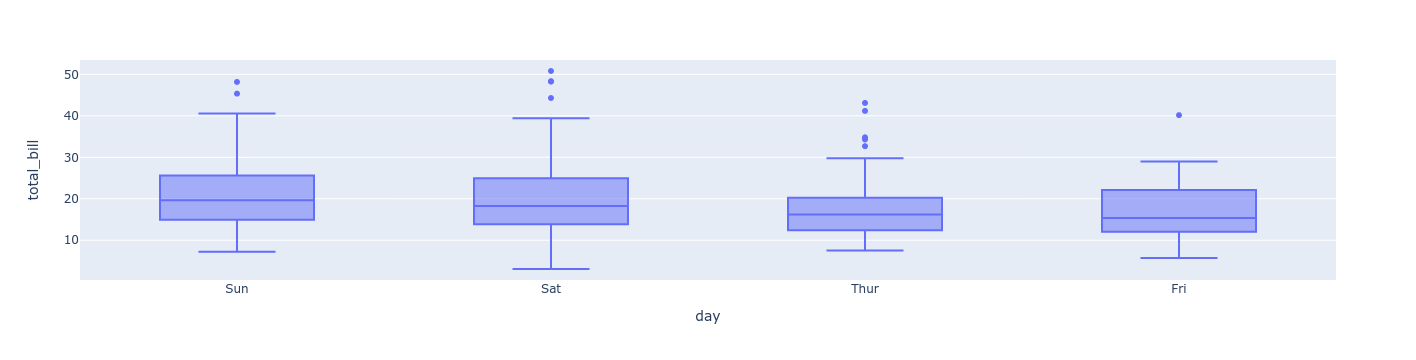

In [18]:
# plotting the box chart
fig = px.box(tips, x="day", y="total_bill") 
  
# showing the plot
fig.show()

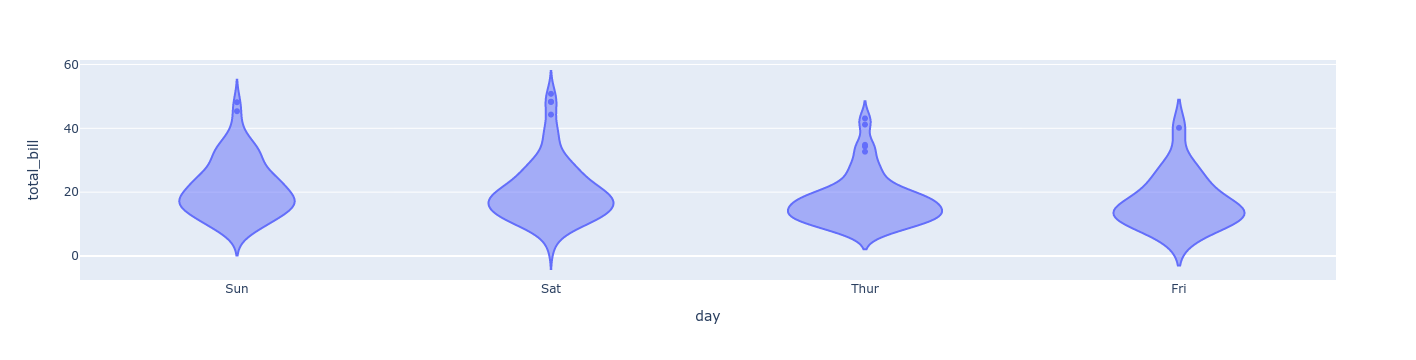

In [19]:
# plotting the violin chart
fig = px.violin(tips, x="day", y="total_bill")
  
# showing the plot
fig.show()

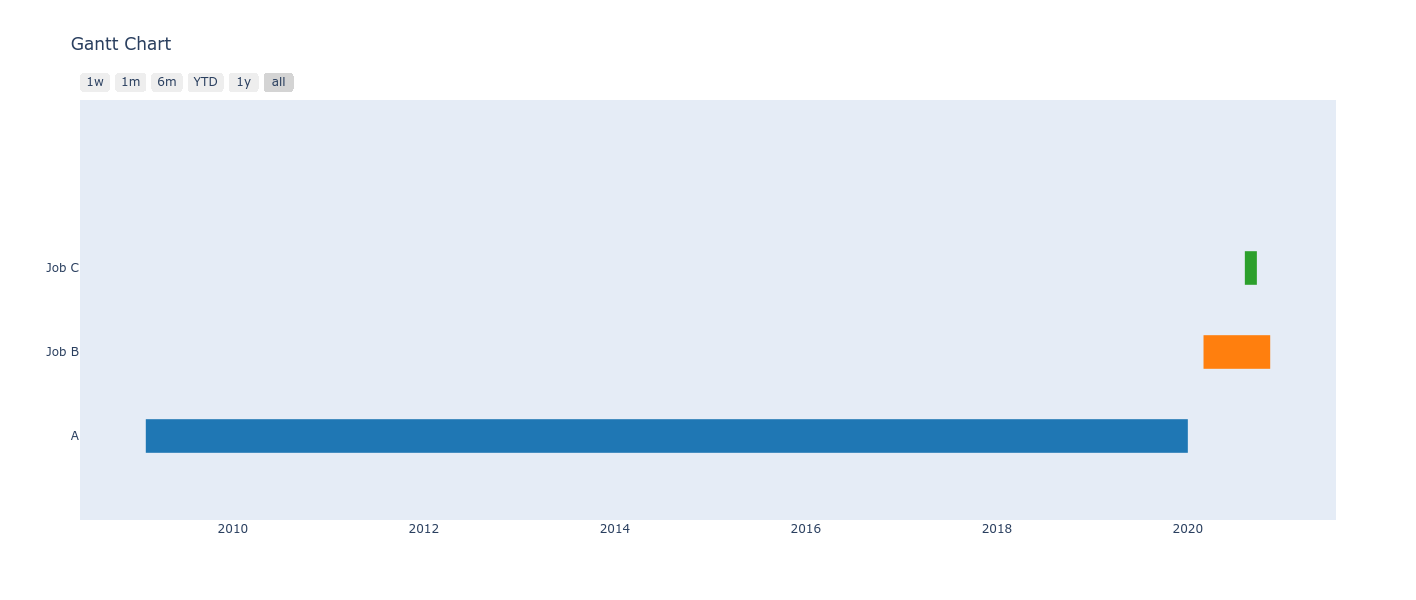

In [20]:
# Data to be plotted
df = [dict(Task="A",     Start='2020-01-01', Finish='2009-02-02'), 
      dict(Task="Job B", Start='2020-03-01', Finish='2020-11-11'), 
      dict(Task="Job C", Start='2020-08-06', Finish='2020-09-21')] 
  
# Creating the plot
fig = ff.create_gantt(df) 
fig.show()

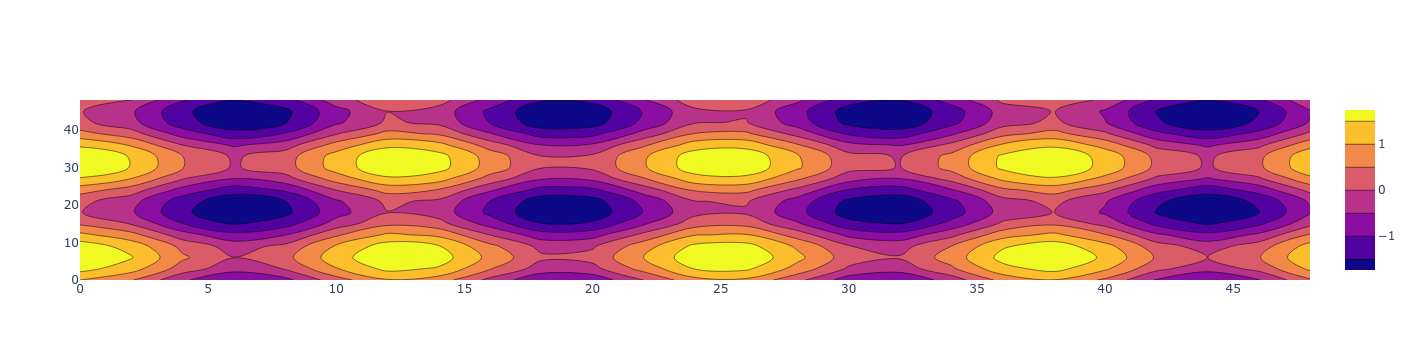

In [21]:
# Creating the X, Y value that will
# change the values of Z as a function
feature_x = np.arange(0, 50, 2) 
feature_y = np.arange(0, 50, 3) 
  
# Creating 2-D grid of features 
[X, Y] = np.meshgrid(feature_x, feature_y) 
  
Z = np.cos(X / 2) + np.sin(Y / 4) 
  
# plotting the figure
fig = go.Figure(data = go.Contour(x = feature_x, y = feature_y, z = Z)) 
fig.show()

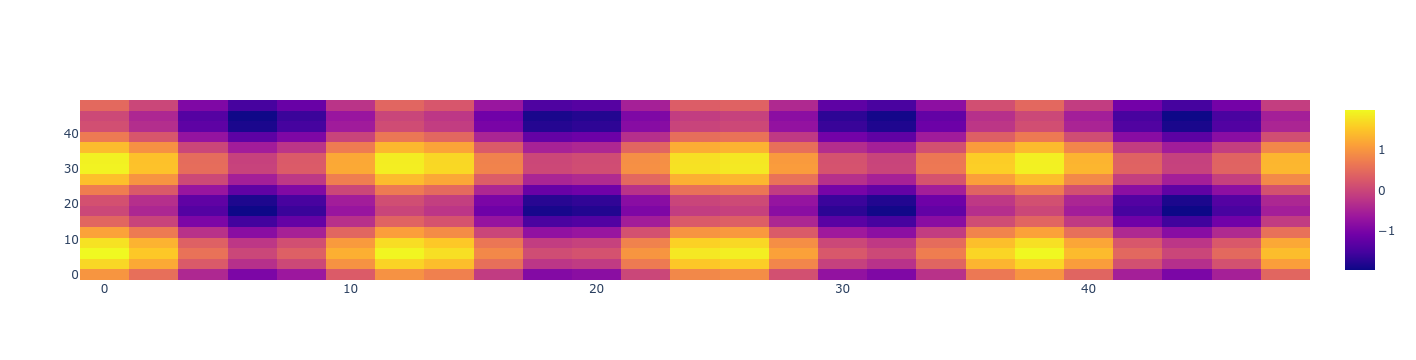

In [22]:
# plotting the figure
fig = go.Figure(data = go.Heatmap(x = feature_x, y = feature_y, z = Z,)) 
  
fig.show()

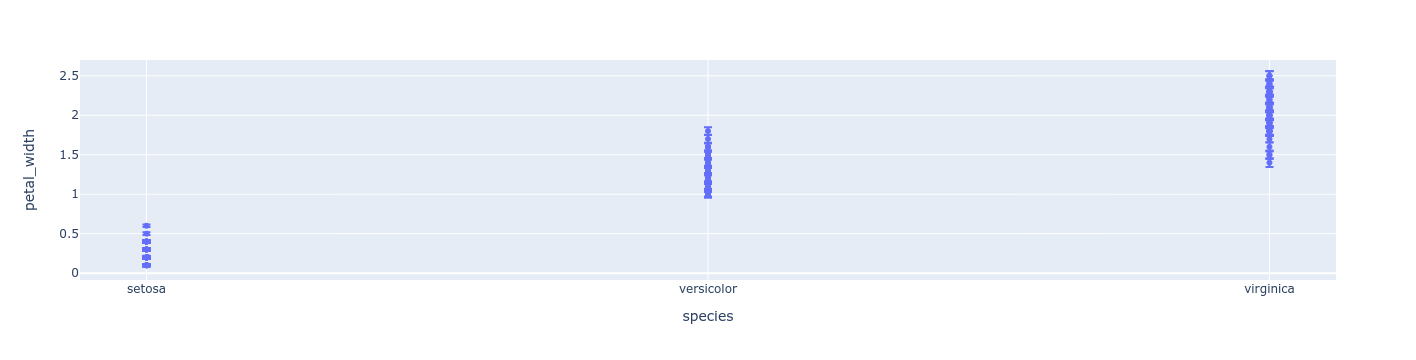

In [23]:
# Calculating the error field
iris["error"] = iris["petal_length"]/100
  
# plotting the scatter chart
fig = px.scatter(iris, x="species", y="petal_width",
                error_x="error", error_y="error") 
  
# showing the plot
fig.show()

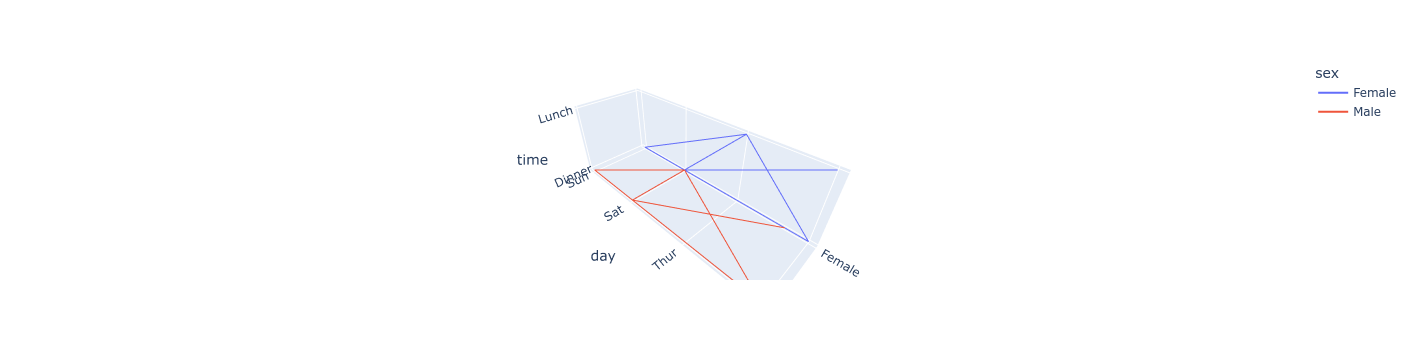

In [24]:
# plotting the figure
fig = px.line_3d(tips, x="sex", y="day", z="time", color="sex") 
fig.show()

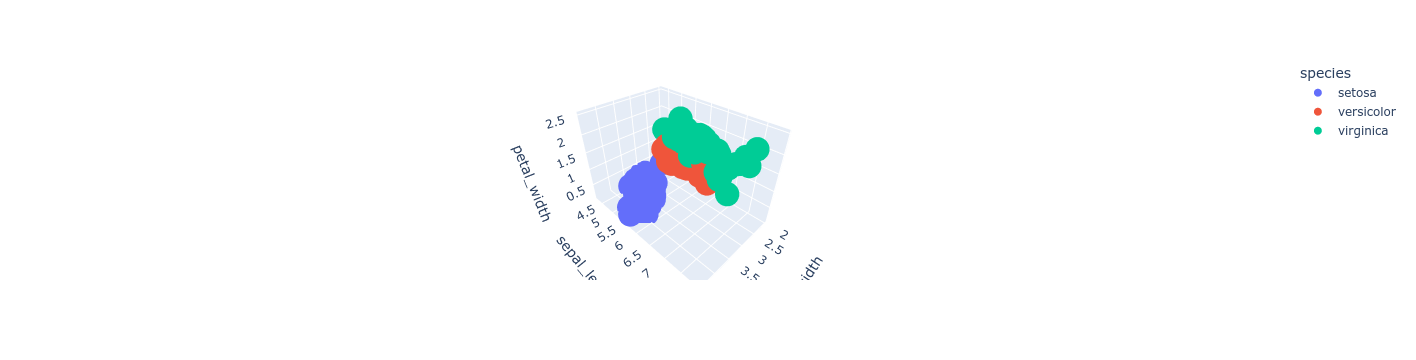

In [25]:
# Plotting the figure
fig = px.scatter_3d(iris, x = 'sepal_width', 
                    y = 'sepal_length', 
                    z = 'petal_width', 
                    color = 'species') 
  
fig.show()

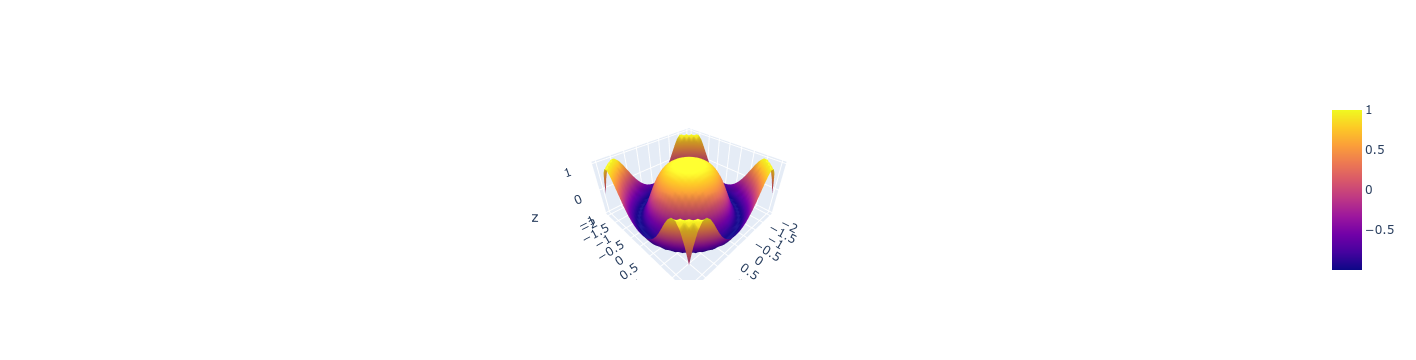

In [26]:
# Data to be plotted
x = np.outer(np.linspace(-2, 2, 30), np.ones(30)) 
y = x.copy().T 
z = np.cos(x ** 2 + y ** 2) 
  
# plotting the figure
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)]) 
  
fig.show()

# Animated plots

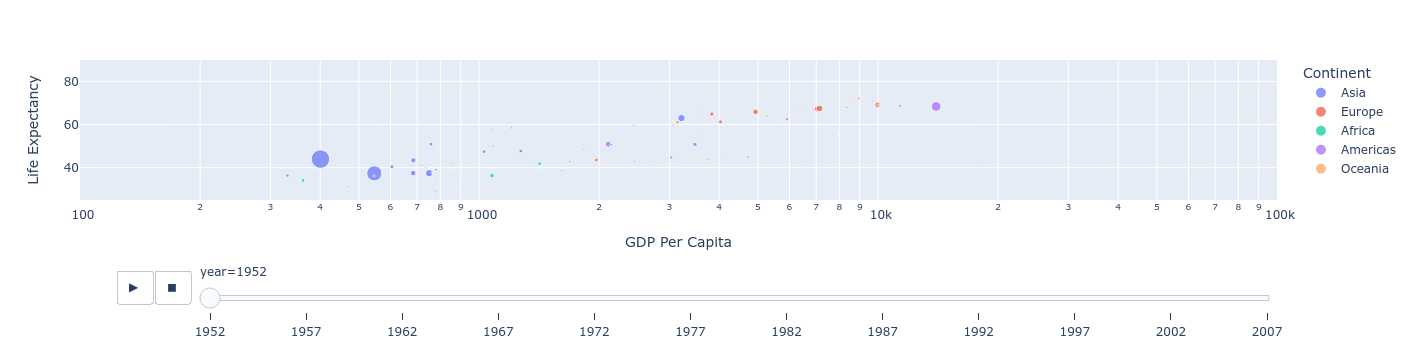

In [27]:
fig = px.scatter(gapminder, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 size='pop',
                 color="continent",
                 hover_data=["country"],
                 labels={
                     "pop": "Population", 
                     "lifeExp": "Life Expectancy",
                     "continent": "Continent",
                     "gdpPercap": "GDP Per Capita",
                     "country": "Country"
                 },
                 animation_frame="year", animation_group="country",
                 log_x=True,
                 range_x=[100,100000], range_y=[25,90]
                ) 
fig.show()

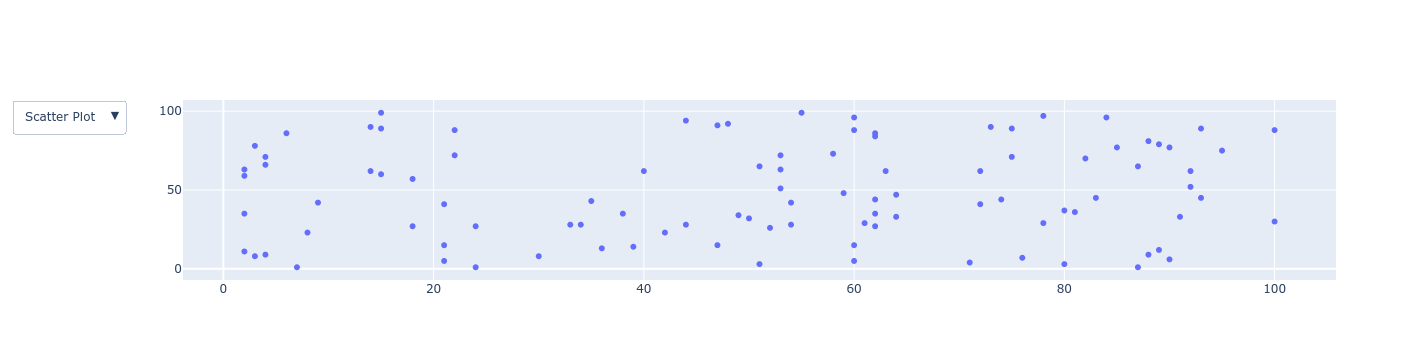

In [28]:
# creating random data through randomint
# function of numpy.random
np.random.seed(42)
  
# Data to be Plotted
random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)
  
plot = go.Figure(data=[go.Scatter(
    x=random_x,
    y=random_y,
    mode='markers',)
])
  
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
            direction="down",
        ),
    ]
)
  
plot.show()

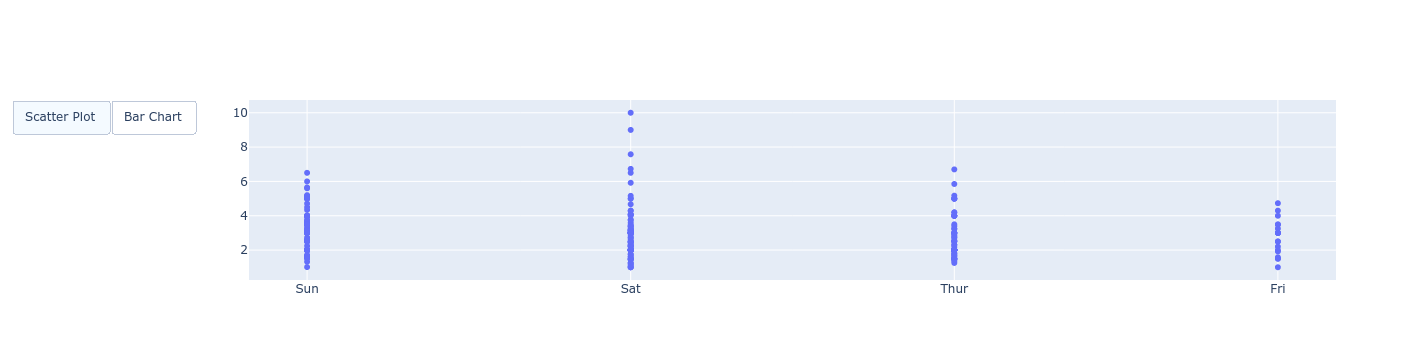

In [29]:
plot = go.Figure(data=[go.Scatter(
    x=tips['day'],
    y=tips['tip'],
    mode='markers',)
])
  
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
        ),
    ]
)
  
plot.show()

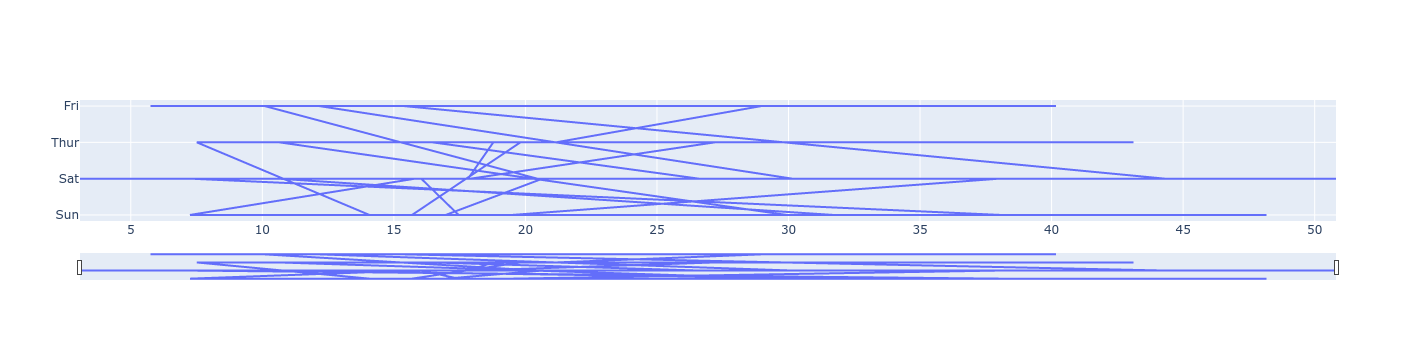

In [30]:
plot = go.Figure(data=[go.Scatter( 
    x=tips['total_bill'], 
    y=tips['day'], 
    mode='lines',) 
]) 
  
plot.update_layout( 
    xaxis=dict( 
        rangeselector=dict( 
            buttons=list([ 
                dict(count=1, 
                    step="day", 
                    stepmode="backward"), 
            ]) 
        ), 
        rangeslider=dict( 
            visible=True
        ), 
    ) 
) 
  
plot.show() 

/tmp/ipykernel_86837/85668484.py:7: RuntimeWarning:

invalid value encountered in divide



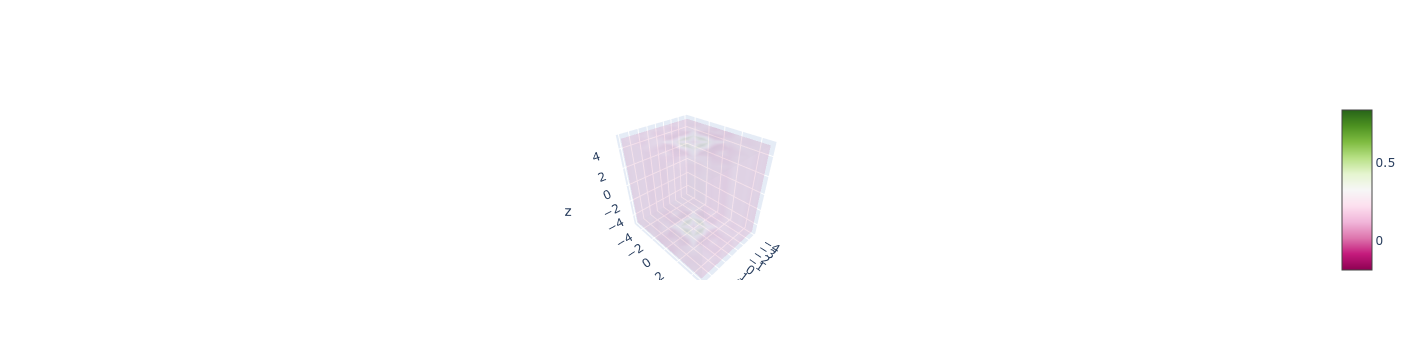

In [31]:
x1 = np.linspace(-4, 4, 9) 
y1 = np.linspace(-5, 5, 11) 
z1 = np.linspace(-5, 5, 11) 
  
X, Y, Z = np.meshgrid(x1, y1, z1)
  
values = (np.sin(X**2 + Y**2))/(X**2 + Y**2)
  
fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=values.flatten(),
    opacity=0.1,
    ))
  
fig.show()

/tmp/ipykernel_86837/4087727493.py:7: RuntimeWarning:

invalid value encountered in divide



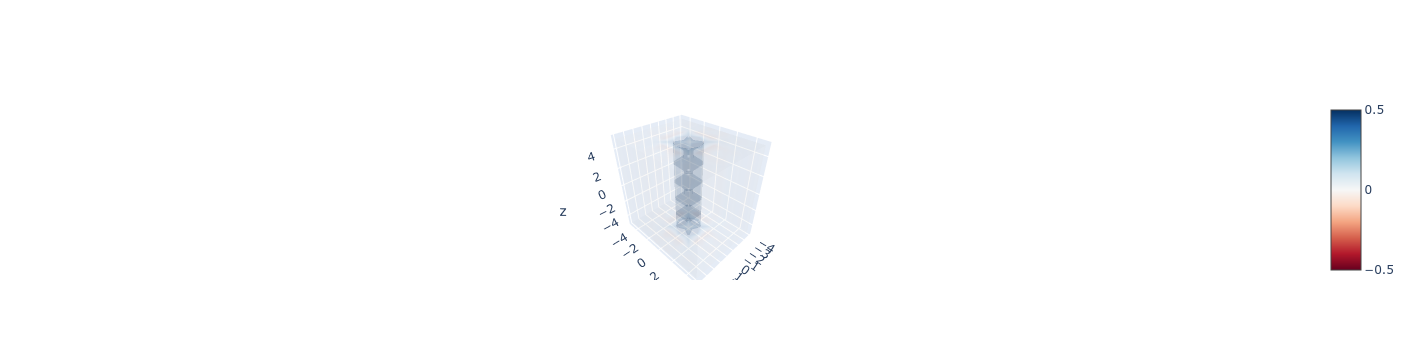

In [32]:
x1 = np.linspace(-4, 4, 9) 
y1 = np.linspace(-5, 5, 11) 
z1 = np.linspace(-5, 5, 11) 
  
X, Y, Z = np.meshgrid(x1, y1, z1)
  
values = (np.sin(X**2 + Y**2))/(X**2 + Y**2)
  
fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(), 
    isomin=-0.5,
    isomax=0.5,
    value=values.flatten(),
    opacity=0.1, 
    opacityscale=[[-0.5, 1], [-0.2, 0], [0.2, 0], [0.5, 1]],
    colorscale='RdBu'
    ))
  
fig.show()


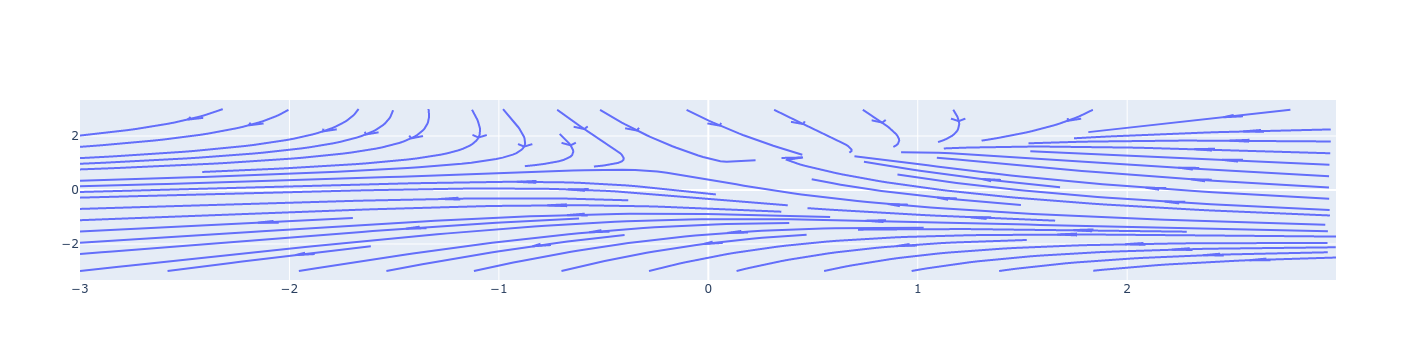

In [33]:
# Add data
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
Y, X = np.meshgrid(x, y)

# Compute the velocity field on the mesh grid
u = -1 - X**2 + Y
v = 1 + X - Y**2
u = u.T  # Transpose
v = v.T  # Transpose

# Create streamline
fig = ff.create_streamline(x, y, u, v, arrow_scale=.1)
fig.show()

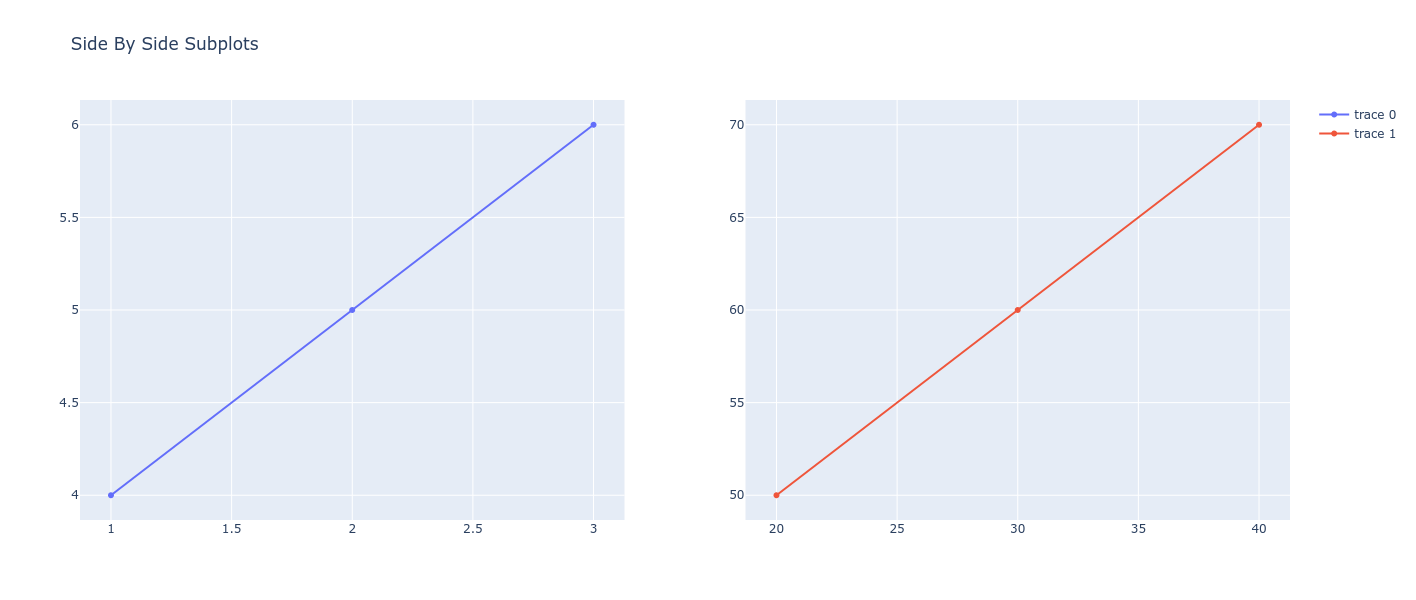

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>